<a href="https://colab.research.google.com/github/NicoPP1/PDI/blob/main/TPfinal/v1TPfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Referencias:

* https://scikit-image.org/docs/dev/auto_examples/edges/plot_active_contours.html

* https://scikit-image.org/docs/dev/api/skimage.segmentation.html#skimage.segmentation.active_contour


#Librerias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.segmentation import active_contour
import imageio

# Funciones a utilizar

In [2]:
def convo(Y,kernel):
    shapeY = Y.shape
    heightY = shapeY[0]
    widthY = shapeY[1]


    shapeKernel = kernel.shape
    heightKernel = shapeKernel[0]
    widthKernel = shapeKernel[1]

    Yconv = np.zeros((heightY,widthY))

    #Según el tamaño del kernel, es distinto el padding de ceros a realizar
    if kernel.shape[0] == 3:
        Ypad = np.zeros((heightY+2,widthY+2))
        Ypad[1:heightY+1,1:widthY+1] = Y
        
        for i in range(heightY):
            for j in range(widthY):
                Yconv[i,j] = np.sum(np.multiply(Ypad[i:i+heightKernel,j:j+widthKernel],kernel))

                
        Yconv = np.clip(Yconv,0,1)

        
    elif kernel.shape[0] == 5:
        Ypad = np.zeros((heightY+4,widthY+4))
        Ypad[2:heightY+2,2:widthY+2] = Y
        
        for i in range(heightY):
            for j in range(widthY):
                Yconv[i,j] = np.sum(np.multiply(Ypad[i:i+heightKernel,j:j+widthKernel],kernel))
                
        Yconv = np.clip(Yconv,0,1)

        
        
    elif kernel.shape[0] == 7:
        Ypad = np.zeros((heightY+6,widthY+6))
        Ypad[3:heightY+3,3:widthY+3] = Y
        
        for i in range(heightY):
            for j in range(widthY):
                Yconv[i,j] = np.sum(np.multiply(Ypad[i:i+heightKernel,j:j+widthKernel],kernel))
                
        Yconv = np.clip(Yconv,0,1)
        
    else:
        print('filtro de orden incorrecto')

    return Yconv

def cargaKernels(k):
    if k == "plano3":
        kernel = (1/9)*np.ones((3,3))
    elif k == "plano5":
        kernel = (1/25)*np.ones((5,5), dtype = 'float64')
    elif k == "plano7":
        kernel = (1/49)*np.ones((7,7))

    elif k == "bartlett3":
        kernel  = (1/16)*np.matrix('1 2 1; 2 4 2; 1 2 1')
    elif k == "bartlett5":
        kernel = (1/81)*np.matrix('1 2 3 2 1 ; 2 4 6 4 2; 3 6 9 6 3; 2 4 6 4 2 ; 1 2 3 2 1')
    elif k == "bartlett7":
        kernel = (1/256)*np.matrix('1 2 3 4 3 2 1; 2 4 6 8 6 4 2; 3 6 9 12 9 6 3; 4 8 12 16 12 8 4; 3 6 9 12 9 6 3; 1 2 3 4 3 2 1; 2 4 6 8 6 4 2')

    elif k == "gaussiano5":
        kernel = (1/256)*np.matrix('1 4 6 4 1; 4 16 24 16 4; 6 24 36 24 6; 4 16 24 16 4; 1 4 6 4 1')
    elif k == "gaussiano7":
        kernel = (1/4096)*np.matrix('1 6 15 20 15 6 1; 6 36 90 120 90 36 6; 15 90 225 300 225 90 15; 20 120 300 400 300 120 20; 15 90 225 300 225 90 15; 6 36 90 120 90 36 6; 1 6 15 20 15 6 1')
   
    elif k == "laplacianov4":
        kernel = np.matrix('0 -1 0; -1 4 -1; 0 -1 0')
    elif k == "laplacianov8":
        kernel = np.matrix('-1 -1 -1; -1 8 -1; -1 -1 -1')
    elif k == "laplaciano5":
        kernel = np.matrix('0 0 -1 0 0; 0 -1 -2 -1 0; -1 -2 16 -2 -1; 0 -1 -2 -1 0;0 0 -1 0 0')

    elif k == "sobelN":
        kernel = np.matrix('-1 -2 -1; 0 0 0; 1 2 1')
    elif k == "sobelNE":
        kernel = np.matrix('0 -1 -2; 1 0 -1; 2 1 0')
    elif k == "sobelE":
        kernel = np.matrix('1 0 -1; 2 0 -2; 1 0 -1')
    elif k == "sobelSE":
        kernel = np.matrix('2 1 0;1 0 -1; 0 -1 -2')

    elif k == "sobelS":
        kernel = np.matrix('1 2 1; 0 0 0; -1 -2 -1')
    elif k == "sobelSW":
        kernel = np.matrix('0 1 2; -1 0 1; -2 -1 0')
    elif k == "sobelW":
        kernel = np.matrix('-1 0 1;-2 0 2; -1 0 1')
    elif k == "sobelNW":
        kernel = np.matrix('-2 -1 0;-1 0 1; 0 1 2')
    elif k == "pasaaltos02":
        kernel = np.matrix('1 -4 6 -4 1; -4 16 -24 16 -4; 6 -24 36 -24 6; -4 16 -24 16 -4; 1 -4 6 -4 1')
    elif k == "pasaaltos04":
        kernel = np.matrix('1 4 -10 4 1;4 16 -40 16 4;-10 -40 100 -40 -10; 4 16 -40 16 4;1 4 -10 4 1')
    elif k == "pasabanda":
        kernel = np.matrix('1 0 -2 0 1; 0 0 0 0 0; -2 0 4 0 -2; 0 0 0 0 0 ; 1 0 -2 0 1')  
  
    return kernel

def globalThreshold(Y,T):
    Ythresh = np.zeros((heightY, widthY))
    for i in range(heightY):
        for j in range(widthY):
            if (Y[i,j] > T):
                Ythresh[i,j] = 1
            else:
                Ythresh[i,j] = 0
    return Ythresh

# Main, filtro imagenes para suavizado de bordes y mejor detección. NO SE USAN EN PRINCIPIO. Explorar sobre otros filtros / operaciones morfológicas.

Text(0.5, 1.0, 'Filtro laplaciano 5x5')

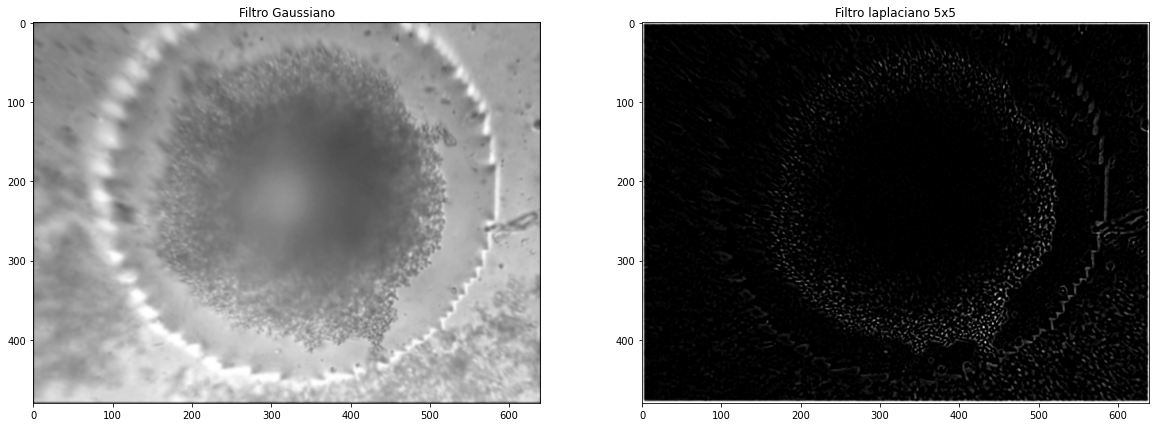

In [39]:
#@title Ingrese la imagen a visualizar
textImage = "70" #@param ["15", "70"]
if textImage == "15":
    url = "15.jpg"
elif textImage == "70":
    url = "70.jpg"

img = imageio.imread(url)
img = rgb2gray(img)

shape = img.shape
heightY = shape[0]
widthY = shape[1]

imgG = convo(img,cargaKernels('gaussiano7'))

Ylp = convo(imgG,cargaKernels('laplaciano5'))


s = np.linspace(0, 2*np.pi, 800)
r = heightY//2 - 25 + 220*np.sin(s)
c = widthY//2 + 220*np.cos(s)
init = np.array([r, c]).T

fig,ax = plt.subplots(1,2)
fig.set_size_inches(20, 10)


ax[0].imshow(imgG,'gray')
ax[0].set_title("Filtro Gaussiano")
ax[1].imshow(Ylp,'gray')
ax[1].set_title("Filtro laplaciano 5x5")

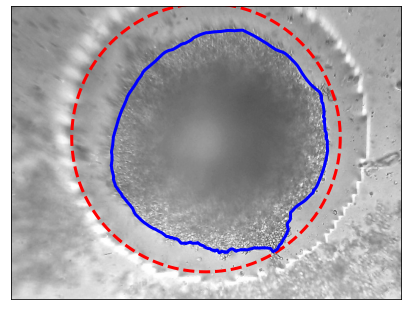

In [42]:
alpha =  0.3#@param {type:"number"}
beta =  0#@param {type:"number"}
gamma =  0.001#@param {type:"number"}
w_line = 0#@param {type:"number"}
w_edge = 1#@param {type:"number"}

snake = active_contour(img,init, alpha=alpha, beta=beta, gamma=gamma) 

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])

plt.show()